# Taiwan Credit Analysis: Data Story
In 2006, Taiwan faced a credit crisis that came to a head in the third quarter of 2006. This all started with banks over-issuing cash and credit to unqualified applicants and was catalyzed by many cardholders, irrespective of their repayment ability, overusing their credit cards for consumption, accruing heavy credit and cash-card debts. This crisis warranted more thorough investigation into improved techniques for assessing the probability of default by each individual consumer.

We have a lot of interesting data from this time period, as detailed below.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In summary, there are 23 features of the dataset that can be explored to get a better understanding of the information provided. Some of them are time-series related information, such as the history of past payment, amount of bill statement in NT dollars, and the amount of previous payments. These are all very abstract concepts and, while they may be informative on their own for a machine learning model, they are quite hard to understand as they are right now. To rectify this issue, I would like to construct visualizations that show where the state of the Taiwan econonmy is from April to September of 2015, by each individual.

To do this, I'll construct a parallel coordinates graph for three sets of data: History of past payment (X6-X11), amount of bill statement (X12-X17), and amount of previous payment (X18-X23). Parallel coordinate graphs are especially useful for visualizing trends in clustered or labeled data, but since this dataset is on a continuous scale, I'll start by just observing overall trends.

In [55]:
# Start with loading packages and data
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates  #pandas wrapping to allow for parallel coord plots
import plotly.plotly as py
import plotly.graph_objs as go

# preliminary cleaning required
defaults_df = pd.DataFrame.from_csv('default_of_credit_card_clients.csv')
# Getting rid of first line mistake
new_header = defaults_df.iloc[0]
defaults_df = defaults_df[1:]
defaults_df.rename(columns = new_header)

#Renaming columns
new_header = list(new_header)
new_header[-1] = 'Y'
defaults_df.columns = new_header

defaults_df = defaults_df.apply(pd.to_numeric)

In [8]:
# Breaking the df into 3 separate dfs, because doing 23 dimensions would be nuts
df_pay_hist = defaults_df.loc[:,'PAY_0':'PAY_6']
print(list(df_pay_hist))
df_bill_amt = defaults_df.loc[:,'BILL_AMT1':'BILL_AMT6']
print(list(df_bill_amt))
df_prev_pay = defaults_df.loc[:,'PAY_AMT1':'PAY_AMT6']
print(list(df_prev_pay))

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [29]:
# Make an ID column. Just have color-coded from ID1-ID30000
df_pay_hist['index_col'] = df_pay_hist.index
df_bill_amt['index_col'] = df_bill_amt.index
df_prev_pay['index_col'] = df_prev_pay.index

In [47]:
# Experimenting with df_pay_hist
import plotly.tools as tls
 
tls.set_credentials_file(
        username="vdz1192", 
        api_key="U2mDsdBvPpOtMj7MCqcy")

# to get your credentials
credentials = tls.get_credentials_file()
data = [
    go.Parcoords(
        line = dict(color = df_pay_hist['index_col'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 30000),
        dimensions = list([
            dict(range = [-2,9],
                 tickvals = [-2,-1,0,1,2,3,4,5,6,7,8,9],
                 label = 'PAY_6: April, 2005', values = df_pay_hist['PAY_6']),
            dict(range = [-2,9],
                 tickvals = [-2,-1,0,1,2,3,4,5,6,7,8,9],
                 visible = True,
                 label = 'PAY_5: May, 2005', values = df_pay_hist['PAY_5']),
            dict(range = [-2,9],
                 tickvals = [-2,-1,0,1,2,3,4,5,6,7,8,9],
                 label = 'PAY_4: June, 2005', values = df_pay_hist['PAY_4']),
            dict(range = [-2,9],
                 tickvals = [-2,-1,0,1,2,3,4,5,6,7,8,9],
                 label = 'PAY_3: July, 2005', values = df_pay_hist['PAY_3']),
            dict(range = [-2,9],
                 ticktext = ['-2','-1','0','1','2','3','4','5','6','7','8','9'],
                 tickvals = [-2,-1,0,1,2,3,4,5,6,7,8,9],
                 label = 'PAY_2: August, 2005', values = df_pay_hist['PAY_2']),
            dict(range = [-2,9],
                 label = 'PAY_0: September, 2005', values = df_pay_hist['PAY_0'])
        ])
    )
]

py.iplot(data, filename = 'parcoords-Pay')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vdz1192/0 or inside your plot.ly account where it is named 'parcoords-Pay'


In [50]:
data = [
    go.Parcoords(
        line = dict(color = df_bill_amt['index_col'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 30000),
        dimensions = list([
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT6: April, 2005', values = df_bill_amt['BILL_AMT6']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT5: May, 2005', values = df_bill_amt['BILL_AMT5']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT4: June, 2005', values = df_bill_amt['BILL_AMT4']),
            dict(range = [-200000,1664089],
                 label = 'BILL_AMT3: July, 2005', values = df_bill_amt['BILL_AMT3']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT2: August, 2005', values = df_bill_amt['BILL_AMT2']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT1: September, 2005', values = df_bill_amt['BILL_AMT1'])
            
        ])
    )
]

py.iplot(data, filename = 'bill-amt')

In [42]:
data = [
    go.Parcoords(
        line = dict(color = df_prev_pay['index_col'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 30000),
        dimensions = list([
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT6: April, 2005', values = df_prev_pay['PAY_AMT6']),
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT5: May, 2005', values = df_prev_pay['PAY_AMT5']),
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT4: June, 2005', values = df_prev_pay['PAY_AMT4']),
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT3: July, 2005', values = df_prev_pay['PAY_AMT3']),
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT2: August, 2005', values = df_prev_pay['PAY_AMT2']),
            dict(range = [-200000,1000000],
                 label = 'PAY_AMT1: September, 2005', values = df_prev_pay['PAY_AMT1'])
            
        ])
    )
]

py.iplot(data, filename = 'prev-Pay')

In [51]:
# Plotting the credit card holders who had 0-100,000 in debt.
data = [
    go.Parcoords(
        line = dict(color = df_bill_amt['index_col'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 30000),
        dimensions = list([
            dict(range = [-200000,1000000],
                 constraintrange = [0,100000],
                 label = 'BILL_AMT6: April, 2005', values = df_bill_amt['BILL_AMT6']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT5: May, 2005', values = df_bill_amt['BILL_AMT5']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT4: June, 2005', values = df_bill_amt['BILL_AMT4']),
            dict(range = [-200000,1664089],
                 label = 'BILL_AMT3: July, 2005', values = df_bill_amt['BILL_AMT3']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT2: August, 2005', values = df_bill_amt['BILL_AMT2']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT1: September, 2005', values = df_bill_amt['BILL_AMT1'])
            
        ])
    )
]

py.iplot(data, filename = 'bill-amt')

In [52]:
# Plotting the credit card holders who had 100,000-200,000 in debt.
data = [
    go.Parcoords(
        line = dict(color = df_bill_amt['index_col'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 30000),
        dimensions = list([
            dict(range = [-200000,1000000],
                 constraintrange = [100000, 200000],
                 label = 'BILL_AMT6: April, 2005', values = df_bill_amt['BILL_AMT6']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT5: May, 2005', values = df_bill_amt['BILL_AMT5']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT4: June, 2005', values = df_bill_amt['BILL_AMT4']),
            dict(range = [-200000,1664089],
                 label = 'BILL_AMT3: July, 2005', values = df_bill_amt['BILL_AMT3']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT2: August, 2005', values = df_bill_amt['BILL_AMT2']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT1: September, 2005', values = df_bill_amt['BILL_AMT1'])
            
        ])
    )
]

py.iplot(data, filename = 'bill-amt')

Wow, so these are plotted on the same scale and you can very easily see that the amount of debt (BILL_AMT) is staying steady or growing, and the payments fluctuate each month, with the average being below the average payments. Also, note how cyclical the payments are. It's almost as if the consumer saves more one month, then pays off the bill, then saves, then pays, and so on. The last plot is the parallel coordinate plot for customers who started with 0-100k NT Dollars of debt. This graphs shows a gradual creep upwards and away from the starting point. Increasing mean and variance.

Usually, parallel coordinate plots work better whenever there are groups and you want to see how those groups have been found previously. Here, I arbitrarly grouped some users who I thought would be more responsible with payments, people with debt between 0-100k NT Dollars, and found that even here, they accumulated debt. However, this was a very arbitrary metric. I then graphed 100k-200k NT Dollars and saw a similar trend. Had I chosen a monther earlier or later, it could have been a totally different group of people. Point is, everything is arbitrary here, and grouping by time series amounts is not a good path. However, it's still interesting to note the tendency for the mean and variance to increase.

What's the amount of given credit as a function of age?

In [53]:
list(defaults_df)

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Y']

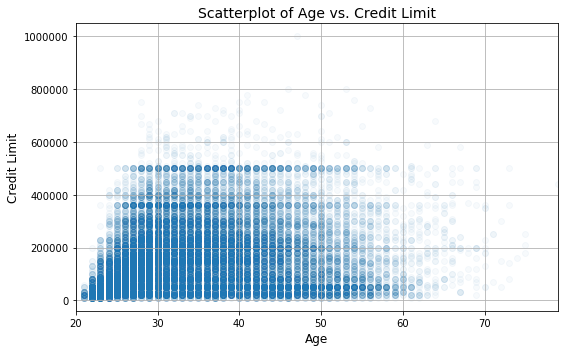

In [62]:
x = defaults_df['AGE']
y = defaults_df['LIMIT_BAL']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.035)

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([20, max(x)])
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Credit Limit', fontsize=12)
ax.set_title('Scatterplot of Age vs. Credit Limit', fontsize=14)

ax.grid(True)
fig.tight_layout()

*There really are no obvious groups to cluster by here. Let's look at some other 2D relationships.*

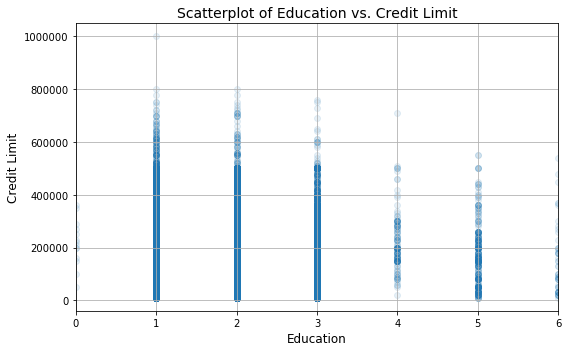

In [66]:
x = defaults_df['EDUCATION']
y = defaults_df['LIMIT_BAL']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.1)

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Education', fontsize=12)
ax.set_ylabel('Credit Limit', fontsize=12)
ax.set_title('Scatterplot of Education vs. Credit Limit', fontsize=14)

ax.grid(True)
fig.tight_layout()

As a reminder, here is what the education scale means:
- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

It makes sense that more educated people would receive higher credit limits. Maybe this is something to group by in the parallel coordinate plots, as we could then see how different groups of people accumulate debt over time.

In [67]:
df_bill_amt['EDUCATION'] = defaults_df['EDUCATION']

In [68]:
# Plotting the credit card holders who had 100,000-200,000 in debt.
data = [
    go.Parcoords(
        line = dict(color = df_bill_amt['EDUCATION'],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 6),
        dimensions = list([
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT6: April, 2005', values = df_bill_amt['BILL_AMT6']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT5: May, 2005', values = df_bill_amt['BILL_AMT5']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT4: June, 2005', values = df_bill_amt['BILL_AMT4']),
            dict(range = [-200000,1664089],
                 label = 'BILL_AMT3: July, 2005', values = df_bill_amt['BILL_AMT3']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT2: August, 2005', values = df_bill_amt['BILL_AMT2']),
            dict(range = [-200000,1000000],
                 label = 'BILL_AMT1: September, 2005', values = df_bill_amt['BILL_AMT1'])
            
        ])
    )
]

py.iplot(data, filename = 'bill-amt')

Well, it seems that higher educated credit card holders are more money-savy, or more risk-averse, than their counterparts. Future hypothesis testing will investigate this observation.